<a href="https://colab.research.google.com/github/i-m-samarth-cs/GreenSkill-Edunet/blob/main/Building_a_Simple_FNN_for_Energy_Prediction%C2%A0_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy pandas matplotlib tensorflow scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
data = pd.read_csv('climate_data.csv')
data.head()

,Temperature,Humidity,Rainfall,Wind Speed,Solar Radiation,Pressure,Population Density,Industrial Activity Index,Green Cover,Air Quality Index,Energy Consumption
0,26.236204,46.154857,145.999662,12.762891,3.793472,1034.723658,7441.396511,0.042661,67.271512,269.289789,2254.722860
1,43.521429,43.303847,36.902399,9.185849,2.568907,999.451704,8822.908563,0.828505,20.168883,276.793110,2694.385935
2,36.959818,32.330774,69.327939,19.289970,2.758155,969.546561,4685.480766,0.249308,76.252466,144.593080,1423.674455
3,32.959755,62.508667,132.656127,4.379569,3.084027,1023.664179,2962.869444,0.283937,69.025688,107.907681,883.981472
4,19.680559,53.363691,96.417869,11.757128,3.221920,991.867814,3256.581086,0.226245,74.319731,97.915263,1001.712463


In [4]:
X = data[['Temperature', 'Humidity', 'Wind Speed', 'Solar Radiation']].values
y = data['Energy Consumption'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1)  # Output layer for regression (1 neuron)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# Mean Squared Error and Mean Absolute Error

In [9]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3020599.2500 - mae: 1507.6293 - val_loss: 3231209.2500 - val_mae: 1567.5363
Epoch 2/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2909628.0000 - mae: 1475.2646 - val_loss: 3025828.7500 - val_mae: 1501.1857
Epoch 3/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2631562.0000 - mae: 1385.7854 - val_loss: 2517656.5000 - val_mae: 1335.1493
Epoch 4/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2215145.0000 - mae: 1237.3396 - val_loss: 1794730.7500 - val_mae: 1105.8320
Epoch 5/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1481897.2500 - mae: 986.1848 - val_loss: 1180892.6250 - val_mae: 905.2994
Epoch 6/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 946071.2500 - mae: 800.5763 - val_loss: 888369.8125 - val_mae: 807.0838
Epoch 7/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 782710.5000 - mae: 754.9802 - val_loss: 813964.8125 - val_mae: 779.2282
Epoch 8/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss

In [10]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 724471.6250 - mae: 743.3467
Test Mean Absolute Error: 723.89


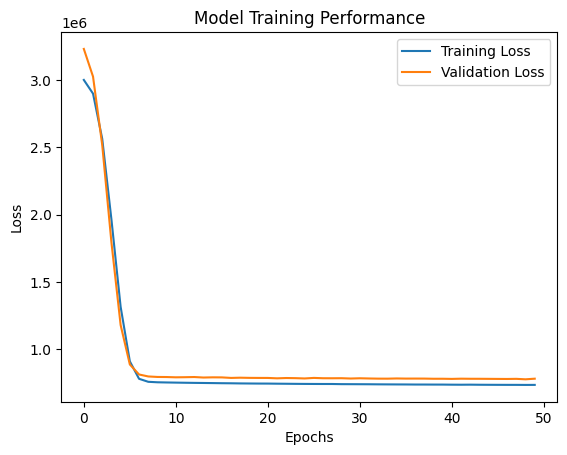

In [11]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(X_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[289.5087 ],
       [249.36821],
       [256.65482],
       [209.19081],
       [361.77713],
       [293.78372],
       [330.44122],
       [286.7758 ],
       [285.7585 ],
       [280.69595],
       [231.86331],
       [250.73708],
       [291.16272],
       [231.55371],
       [301.4211 ],
       [309.21936],
       [262.53665],
       [308.34488],
       [302.10764],
       [246.85612],
       [273.6247 ],
       [286.38968],
       [277.55313],
       [279.33914],
       [245.13942],
       [241.08409],
       [261.95837],
       [323.30417],
       [309.2378 ],
       [264.05396],
       [230.15196],
       [288.06552],
       [287.89444],
       [272.28873],
       [318.85587],
       [282.56845],
       [215.29771],
       [253.26848],
       [276.2053 ],
       [244.06752],
       [248.18697],
       [254.70776],
       [252.55244],
       [257.57132],
       [267.98788],
       [253.06398],
       [264.4318 ],
       [248.75488],
       [286.03497],
       [296.8774 ],


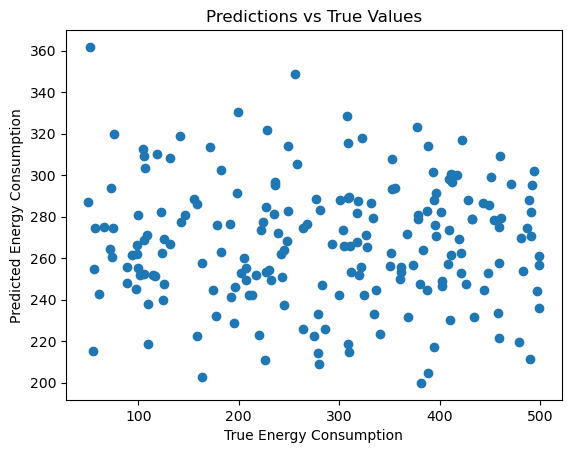

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predictions vs True Values')
plt.show()